In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

disney = pd.read_csv(r"C:\Users\Tyler\Downloads\disney_plus_titles.csv")

#### A look at the data

In [2]:
# disney.head()
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [3]:
status = 'Unknown'
disney.loc[disney.director.isna(), 'director'] = status
disney.loc[disney.cast.isna(), 'cast'] = status
disney.loc[disney.country.isna(), 'country'] = status
disney.loc[disney['date_added'].isna(), 'date_added'] = status

### Does Disney+ has more focus on TV shows than movies in recent years?

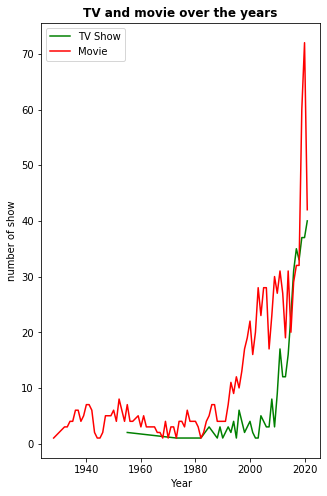

In [4]:
tv = disney[disney['type']=='TV Show']
movie = disney[disney['type']=='Movie']
tv_each_year = tv.groupby('release_year')['type'].count()
movie_each_year = movie.groupby('release_year')['type'].count()

plt.figure(figsize=(5, 8))
plt.plot(tv_each_year.index, tv_each_year, c='g', label='TV Show')
plt.plot(movie_each_year.index, movie_each_year, c='r', label='Movie')
plt.xlabel(' Year')
plt.ylabel('number of show')
plt.title('TV and movie over the years', fontdict={'fontweight':'bold', 'fontsize':12})
plt.legend()
plt.show()

The number of TV shows release each year has been increasing over the year. However, it does not look like Disney+ has focus more on TV shows than movie. If we exclude 2020, we can see that the number of movies release each year is almost always more than the number of TV shows release each year. 

### What content is available in each countries 

In [5]:
def get_unique(df, colname):
    df_2 = df[colname].str.split(',', expand=True)
    df_trimmed = df_2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    special = []
    
    for colname in df_trimmed.columns:
        special.append(list(pd.unique(df_trimmed[colname])))
    special_1 = special[0]

    for i in range(1,len(special)):
        for j in range(len(special[i])):
            if special[i][j] not in special_1:
                special_1.append(special[i][j])
            else:
                pass
    
    special_1.remove(None)
    return special_1
        

In [6]:
unique_countries = get_unique(disney, 'country')
unique_genres = get_unique(disney, 'listed_in')

In [7]:
len(unique_countries)

48

Will only look at the top 3 countries that has the most shows/movies and compare their genre of shows

In [8]:
def get_number(df, colname, name):
    count_df = pd.DataFrame(name, index=range(len(name)), columns=[colname])
    numbers = []
    for i in range(len(name)):
        numbers.append(len(df[df[colname].str.contains(name[i])]))
    count_df['counts'] = numbers
    return count_df

num_shows_countries = get_number(disney, 'country', unique_countries)
num_genres = get_number(disney, 'listed_in', unique_genres)

In [9]:
num_shows_countries.nlargest(5, columns='counts')

,country,counts
1,United States,1147
0,Unknown,175
6,United Kingdom,97
3,Canada,72
5,Australia,22


In [10]:
USA = disney[disney['country'].str.contains('United States')]
UK = disney[disney['country'].str.contains('United Kingdom')]
Canada = disney[disney['country'].str.contains('Canada')]

num_genres_us = get_number(USA, 'listed_in', unique_genres)
num_genres_uk = get_number(UK, 'listed_in', unique_genres)
num_genres_canada = get_number(Canada, 'listed_in', unique_genres)

sorted_us = num_genres_us[num_genres_us['counts'] >0].sort_values(by='counts',ascending=True)
sorted_uk = num_genres_uk[num_genres_uk['counts']>0].sort_values(by='counts',ascending=True)
sorted_canada = num_genres_canada[num_genres_canada['counts']>0].sort_values(by='counts',ascending=True)

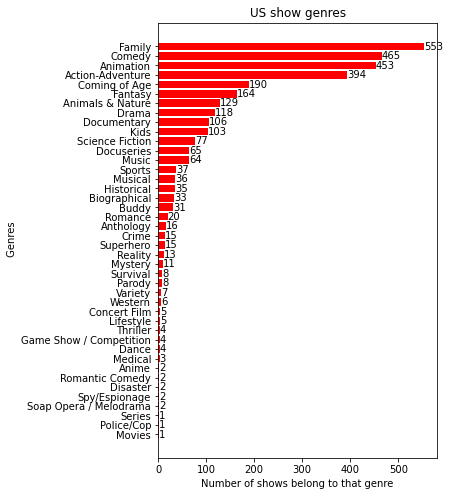

In [11]:
plt.figure(figsize=(5,8))
plt.barh(sorted_us['listed_in'], sorted_us['counts'], color='r')
for i, v in enumerate(sorted_us['counts']):
    plt.text(v, i, str(v), va='center')
plt.title('US show genres')
plt.xlabel('Number of shows belong to that genre')
plt.ylabel(' Genres')
plt.show()

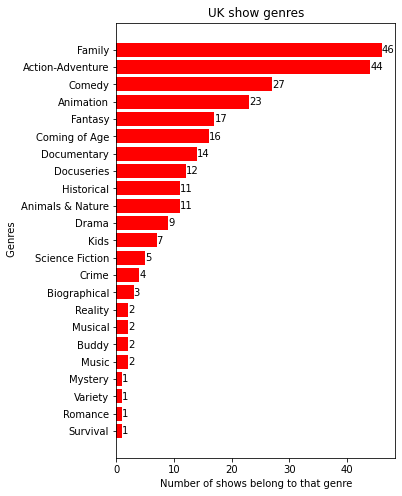

In [12]:
plt.figure(figsize=(5, 8))
plt.barh(sorted_uk['listed_in'], sorted_uk['counts'], color='r')
for i, v in enumerate(sorted_uk['counts']):
    plt.text(v, i, str(v), va='center')
plt.title('UK show genres')
plt.xlabel('Number of shows belong to that genre')
plt.ylabel(' Genres')
plt.show()

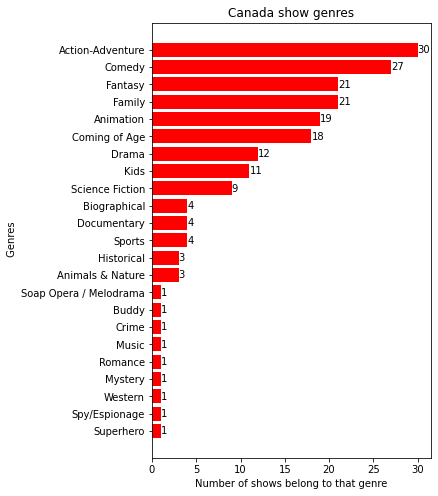

In [13]:
plt.figure(figsize=(5, 8))
plt.barh(sorted_canada['listed_in'], sorted_canada['counts'], color='r')
for i, v in enumerate(sorted_canada['counts']):
    plt.text(v, i, str(v), va='center')
plt.title('Canada show genres')
plt.xlabel('Number of shows belong to that genre')
plt.ylabel(' Genres')
plt.xticks()
plt.show()

Looking at all three graphs, Disney+ clearly releases more shows with variety of genres in the US. In the US, it seems Disney+ release more TV shows/movies in the family genre which could indicate that a decent portion of Disney+ subscribers have at least one children. 

### Which month has the most TV shows/movie being added?

In [14]:
month = []
for i in range(len(disney)):
    month.append(disney['date_added'].str.split(' ')[i][0])
disney['Month added'] = month
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month added
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",Unknown,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,September
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,September
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,September
3,s4,TV Show,Dog: Impossible,Unknown,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,September
4,s5,TV Show,Spidey And His Amazing Friends,Unknown,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,September


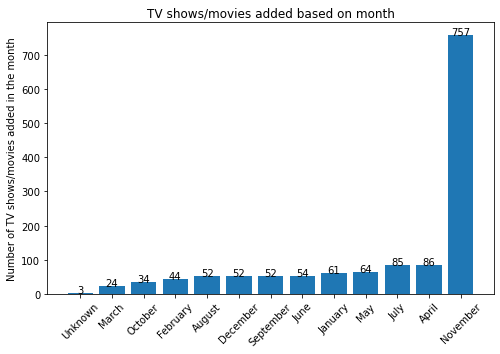

In [15]:
month_added = disney.groupby('Month added')['Month added'].count().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(month_added.index, month_added)
plt.xticks(rotation=45, va='top')
plt.ylabel('Number of TV shows/movies added in the month')
plt.title('TV shows/movies added based on month')
for index, value in enumerate(month_added):
    plt.text(index, value, str(value), ha='center')
plt.show()

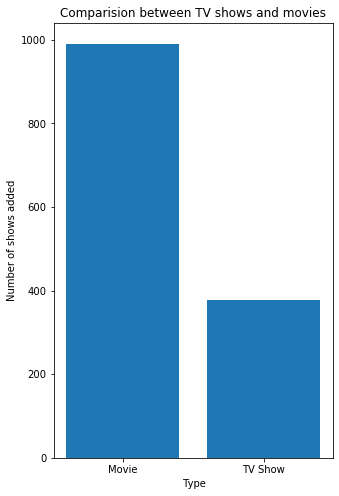

In [16]:
november = disney[disney['Month added']=='November']
grouped_november = disney.groupby('type')['type'].count()

plt.figure(figsize=(5,8))
plt.bar(grouped_november.index, grouped_november)
plt.title('Comparision between TV shows and movies')
plt.ylabel('Number of shows added')
plt.xlabel(' Type')

plt.show()

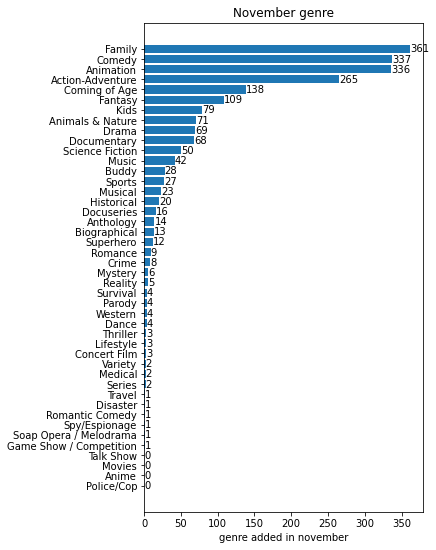

In [17]:
november_genre = get_number(november, 'listed_in', unique_genres).sort_values(by='counts')

plt.figure(figsize=(5, 9))
plt.barh(november_genre['listed_in'], november_genre['counts'])
for i, v in enumerate(november_genre['counts']):
    plt.text(v, i, str(v), va='center')
plt.title('November genre')
plt.xlabel('genre added in november')
plt.show()